<a href="https://colab.research.google.com/github/FayyazaAq/VDI_Tasks/blob/main/Visualisasi_Kunjungan_Tempat_di_Tokyo__VDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Data

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/dataset_TSMC2014_TKY.csv')

In [ ]:
data.head(10)

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
0,1541,4f0fd5a8e4b03856eeb6c8cb,4bf58dd8d48988d10c951735,Cosmetics Shop,35.705101,139.619590,540,Tue Apr 03 18:17:18 +0000 2012
1,868,4b7b884ff964a5207d662fe3,4bf58dd8d48988d1d1941735,Ramen / Noodle House,35.715581,139.800317,540,Tue Apr 03 18:22:04 +0000 2012
2,114,4c16fdda96040f477cc473a5,4d954b0ea243a5684a65b473,Convenience Store,35.714542,139.480065,540,Tue Apr 03 19:12:07 +0000 2012
3,868,4c178638c2dfc928651ea869,4bf58dd8d48988d118951735,Food & Drink Shop,35.725592,139.776633,540,Tue Apr 03 19:12:13 +0000 2012
4,1458,4f568309e4b071452e447afe,4f2a210c4b9023bd5841ed28,Housing Development,35.656083,139.734046,540,Tue Apr 03 19:18:23 +0000 2012
5,1541,4b83b207f964a5202c0d31e3,4bf58dd8d48988d1f8941735,Furniture / Home Store,35.705074,139.619502,540,Tue Apr 03 19:20:09 +0000 2012
6,1541,4ea281c302d529c116a57755,4d954b0ea243a5684a65b473,Convenience Store,35.706277,139.617782,540,Tue Apr 03 19:21:00 +0000 2012
7,114,4b3eae5cf964a520b4a025e3,4bf58dd8d48988d129951735,Train Station,35.700253,139.480255,540,Tue Apr 03 19:35:36 +0000 2012
8,1635,4cca7bd67965b60c80f0858a,4bf58dd8d48988d162941735,Other Great Outdoors,35.755759,139.733573,540,Tue Apr 03 19:51:50 +0000 2012
9,2033,4b5c7671f964a520083129e3,4bf58dd8d48988d1d1941735,Ramen / Noodle House,35.693121,139.699447,540,Tue Apr 03 19:51:59 +0000 2012


Splitting Data

In [ ]:
# Mengubah format data 'utcTimestamp' menjadi format datetime agar dapat dikenali oleh library pandas (pd)
data['utcTimestamp'] = pd.to_datetime(data['utcTimestamp'])

# Split kolom 'utcTimestamp' menjadi kolom 'tanggal', 'waktu', 'jam', dan 'bulan'
# data['tanggal'] = data['utcTimestamp'].dt.date
data['waktu'] = data['utcTimestamp'].dt.time
data['jam'] = data['utcTimestamp'].dt.hour
data['bulan'] = data['utcTimestamp'].dt.month

<ipython-input-29-41fdc27c5bb0>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [ ]:
# Menentukan kategori waktu berdasarkan kolom 'jam'
def kategori_waktu(hour):
    if 5 <= hour < 12:
        return 'Pagi'
    elif 12 <= hour < 18:
        return 'Siang'
    else :
        return 'Malam'

# Menggunakan kolom 'jam', buat kolom 'kategori_waktu'
data['kategori_waktu'] = data['jam'].apply(kategori_waktu)

In [ ]:
# Menentukan musim berdasarkan kolom bulan
def tentukan_musim(bulan):
    if bulan in [3, 4, 5]:
        return "Musim Semi "
    elif bulan in [6, 7, 8]:
        return "Musim Panas"
    elif bulan in [9, 10, 11]:
        return "Musim Gugur"
    elif bulan in [12, 1, 2]:
        return "Musim Dingin "
    else:
        return "Bulan tidak valid!"

# Menerapkan logika ke seluruh kolom 'bulan'
data["musim"] = data["bulan"].apply(tentukan_musim)

In [ ]:
data.head(10)

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp,waktu,jam,bulan,kategori_waktu,musim
0,1541,4f0fd5a8e4b03856eeb6c8cb,4bf58dd8d48988d10c951735,Cosmetics Shop,35.705101,139.619590,540,2012-04-03 18:17:18+00:00,18:17:18,18,4,Malam,Musim Semi
1,868,4b7b884ff964a5207d662fe3,4bf58dd8d48988d1d1941735,Ramen / Noodle House,35.715581,139.800317,540,2012-04-03 18:22:04+00:00,18:22:04,18,4,Malam,Musim Semi
2,114,4c16fdda96040f477cc473a5,4d954b0ea243a5684a65b473,Convenience Store,35.714542,139.480065,540,2012-04-03 19:12:07+00:00,19:12:07,19,4,Malam,Musim Semi
3,868,4c178638c2dfc928651ea869,4bf58dd8d48988d118951735,Food & Drink Shop,35.725592,139.776633,540,2012-04-03 19:12:13+00:00,19:12:13,19,4,Malam,Musim Semi
4,1458,4f568309e4b071452e447afe,4f2a210c4b9023bd5841ed28,Housing Development,35.656083,139.734046,540,2012-04-03 19:18:23+00:00,19:18:23,19,4,Malam,Musim Semi
5,1541,4b83b207f964a5202c0d31e3,4bf58dd8d48988d1f8941735,Furniture / Home Store,35.705074,139.619502,540,2012-04-03 19:20:09+00:00,19:20:09,19,4,Malam,Musim Semi
6,1541,4ea281c302d529c116a57755,4d954b0ea243a5684a65b473,Convenience Store,35.706277,139.617782,540,2012-04-03 19:21:00+00:00,19:21:00,19,4,Malam,Musim Semi
7,114,4b3eae5cf964a520b4a025e3,4bf58dd8d48988d129951735,Train Station,35.700253,139.480255,540,2012-04-03 19:35:36+00:00,19:35:36,19,4,Malam,Musim Semi
8,1635,4cca7bd67965b60c80f0858a,4bf58dd8d48988d162941735,Other Great Outdoors,35.755759,139.733573,540,2012-04-03 19:51:50+00:00,19:51:50,19,4,Malam,Musim Semi
9,2033,4b5c7671f964a520083129e3,4bf58dd8d48988d1d1941735,Ramen / Noodle House,35.693121,139.699447,540,2012-04-03 19:51:59+00:00,19:51:59,19,4,Malam,Musim Semi


Cleaning data

In [ ]:
# Cek missing value
data.isnull().sum()

,0
userId,0
venueId,0
venueCategoryId,0
venueCategory,0
latitude,0
longitude,0
timezoneOffset,0
utcTimestamp,0
waktu,0
jam,0


In [ ]:
# Cek data duplikat
duplikat=data[data.duplicated(keep=False)]
duplikat

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp,waktu,jam,bulan,kategori_waktu,musim
145,1790,4c0f80b67189c928f11bdab6,4bf58dd8d48988d12a951735,Train Station,35.654550,139.756742,540,2012-04-03 22:27:25+00:00,22:27:25,22,4,Malam,Musim Semi
146,1790,4c0f80b67189c928f11bdab6,4bf58dd8d48988d12a951735,Train Station,35.654550,139.756742,540,2012-04-03 22:27:25+00:00,22:27:25,22,4,Malam,Musim Semi
628,701,4f387173e4b0ea2d7efc515f,4bf58dd8d48988d124941735,Office,35.656372,139.699338,540,2012-04-04 00:02:51+00:00,00:02:51,0,4,Malam,Musim Semi
629,701,4f387173e4b0ea2d7efc515f,4bf58dd8d48988d124941735,Office,35.656372,139.699338,540,2012-04-04 00:02:51+00:00,00:02:51,0,4,Malam,Musim Semi
896,928,4b6644f7f964a520811b2be3,4bf58dd8d48988d114951735,Bookstore,35.553344,139.646916,540,2012-04-04 01:52:32+00:00,01:52:32,1,4,Malam,Musim Semi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568220,1197,4b3eab45f964a52095a025e3,4bf58dd8d48988d129951735,Train Station,35.702706,139.560830,540,2013-02-12 11:18:44+00:00,11:18:44,11,2,Pagi,Musim Dingin
569660,1367,4b91e099f964a52021dd33e3,4bf58dd8d48988d165941735,Scenic Lookout,35.660286,139.729110,540,2013-02-13 06:52:25+00:00,06:52:25,6,2,Pagi,Musim Dingin
569661,1367,4b91e099f964a52021dd33e3,4bf58dd8d48988d165941735,Scenic Lookout,35.660286,139.729110,540,2013-02-13 06:52:25+00:00,06:52:25,6,2,Pagi,Musim Dingin
572835,825,4c8aba226418a1434a9ae2ce,4d954b0ea243a5684a65b473,Convenience Store,35.551834,139.666562,540,2013-02-14 09:26:14+00:00,09:26:14,9,2,Pagi,Musim Dingin


In [ ]:
# Hapus data duplikat
data_cleaned = data.drop_duplicates()

print(f"Jumlah data sebelum: {len(data)}")
print(f"Jumlah data setelah: {len(data_cleaned)}")

Jumlah data sebelum: 573703
Jumlah data setelah: 573126


In [ ]:
# Hapus kolom yang tidak dibutuhkan
new_data = data_cleaned.drop(['latitude', 'longitude', 'timezoneOffset', 'utcTimestamp'],
                             axis = 1)
new_data.head(10)

,userId,venueId,venueCategoryId,venueCategory,waktu,jam,bulan,kategori_waktu,musim
0,1541,4f0fd5a8e4b03856eeb6c8cb,4bf58dd8d48988d10c951735,Cosmetics Shop,18:17:18,18,4,Malam,Musim Semi
1,868,4b7b884ff964a5207d662fe3,4bf58dd8d48988d1d1941735,Ramen / Noodle House,18:22:04,18,4,Malam,Musim Semi
2,114,4c16fdda96040f477cc473a5,4d954b0ea243a5684a65b473,Convenience Store,19:12:07,19,4,Malam,Musim Semi
3,868,4c178638c2dfc928651ea869,4bf58dd8d48988d118951735,Food & Drink Shop,19:12:13,19,4,Malam,Musim Semi
4,1458,4f568309e4b071452e447afe,4f2a210c4b9023bd5841ed28,Housing Development,19:18:23,19,4,Malam,Musim Semi
5,1541,4b83b207f964a5202c0d31e3,4bf58dd8d48988d1f8941735,Furniture / Home Store,19:20:09,19,4,Malam,Musim Semi
6,1541,4ea281c302d529c116a57755,4d954b0ea243a5684a65b473,Convenience Store,19:21:00,19,4,Malam,Musim Semi
7,114,4b3eae5cf964a520b4a025e3,4bf58dd8d48988d129951735,Train Station,19:35:36,19,4,Malam,Musim Semi
8,1635,4cca7bd67965b60c80f0858a,4bf58dd8d48988d162941735,Other Great Outdoors,19:51:50,19,4,Malam,Musim Semi
9,2033,4b5c7671f964a520083129e3,4bf58dd8d48988d1d1941735,Ramen / Noodle House,19:51:59,19,4,Malam,Musim Semi


Visualisasi Pertanyaan

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Pertanyaan a)

In [ ]:
# Hitung jumlah entri per kategori
category_counts = new_data['venueCategory'].value_counts()

# Ambil 10 kategori teratas
top10 = category_counts.head(10)

<ipython-input-39-766b89705648>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




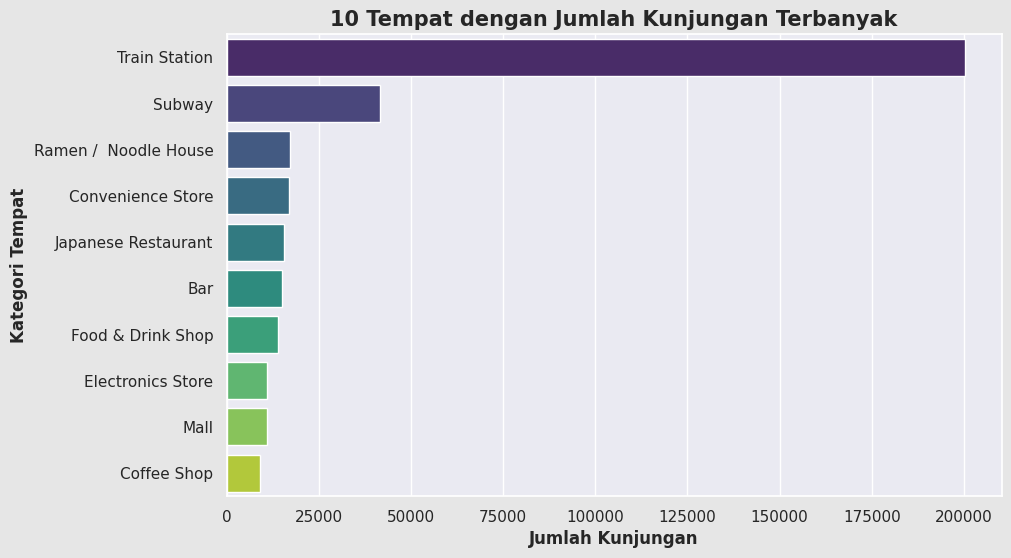

In [ ]:
# Visualisasi 10 Tempat dengan Jumlah Kunjungan Terbanyak
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.barplot(x = top10.values, y = top10.index, palette="viridis")
plt.xlabel('Jumlah Kunjungan', fontweight='bold')
plt.ylabel('Kategori Tempat', fontweight='bold')
plt.title('10 Tempat dengan Jumlah Kunjungan Terbanyak', fontsize=15, fontweight='bold')
plt.gcf().set_facecolor('0.9')
plt.show()

Pertanyaan b)

In [ ]:
quest_b = pd.DataFrame(new_data)

# Menghitung frekuensi kunjungan per kombinasi kategori waktu dan kategori tempat
agg_data = (
    quest_b.groupby(['kategori_waktu', 'venueCategory'])
    .size()
    .reset_index(name='jumlah_kunjungan')
    )

# Menggabungkan kembali dengan DataFrame asli untuk menambah kolom frekuensi kunjungan
freq_b = quest_b.merge(agg_data, on=['kategori_waktu', 'venueCategory'], how='left')

In [ ]:
fig = px.line(agg_data,
              x='kategori_waktu',           # Sumbu X: Kategori Waktu
              y='jumlah_kunjungan',         # Sumbu Y: Frekuensi Kunjungan
              color='venueCategory',        # Warna garis berdasarkan Kategori Tempat
              markers=True,                 # Menambahkan marker pada titik data
              title='Frekuensi Kunjungan Berdasarkan Kategori Waktu dan Tempat',
              labels={'kategori_waktu': 'Kategori Waktu', 'jumlah_kunjungan': 'Frekuensi Kunjungan'})

# Menentukan urutan warna dan tambahkan latar belakang
fig.update_traces(mode="lines+markers")

# Menentukan latar belakang plot
fig.update_layout(
    xaxis_title="Kategori Waktu",
    yaxis_title="Frekuensi Kunjungan",
    paper_bgcolor="lightgrey",
    plot_bgcolor="lightgrey",
)

# Menampilkan plot
fig.show()

In [ ]:
top20 = agg_data.sort_values(by='jumlah_kunjungan', ascending=False).head(20)

Text(0.5, 1.0, 'Top 20 Kategori Waktu dengan Kunjungan Tertinggi')

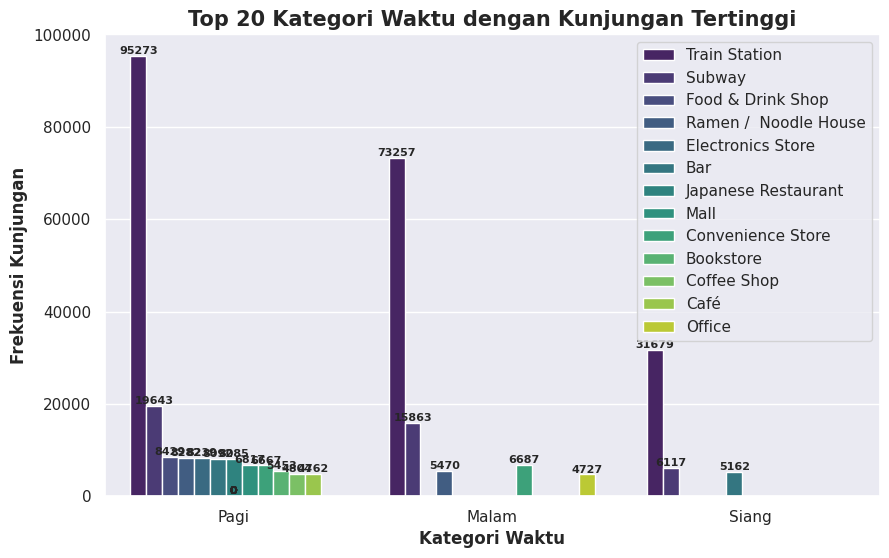

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.set_color_codes("pastel")

barplot = sns.barplot(x = top20["kategori_waktu"], y = top20["jumlah_kunjungan"],
                      hue = top20["venueCategory"], palette="viridis")

for bar in barplot.patches:
    bar_x = bar.get_x() + bar.get_width() / 2  # Posisi x di tengah bar
    bar_y = bar.get_height()
    plt.text(
        bar_x,
        bar_y + 0.5,  # Tambahkan jarak kecil di atas bar
        f"{int(bar_y)}",
        ha="center",
        va="bottom",
        fontsize=8,
        fontweight='bold'
    )

plt.legend(loc='upper right')
plt.xlabel("Kategori Waktu", fontweight='bold')
plt.ylabel("Frekuensi Kunjungan", fontweight='bold')
plt.title("Top 20 Kategori Waktu dengan Kunjungan Tertinggi", fontsize=15, fontweight='bold')

Pertanyaan c)

In [ ]:
# Hitung jumlah kunjungan berdasarkan tempat dan jam
kunjungan_jam = (
    new_data.groupby(["jam", "venueCategory"])
    .size()
    .reset_index(name="jumlah_kunjungan")
)

# Ambil tempat dengan kunjungan terbanyak di setiap musim
terbanyak_per_jam = kunjungan_jam.loc[kunjungan_jam.groupby("jam")["jumlah_kunjungan"]
                                      .idxmax()]

<ipython-input-55-2bb210c73d5d>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




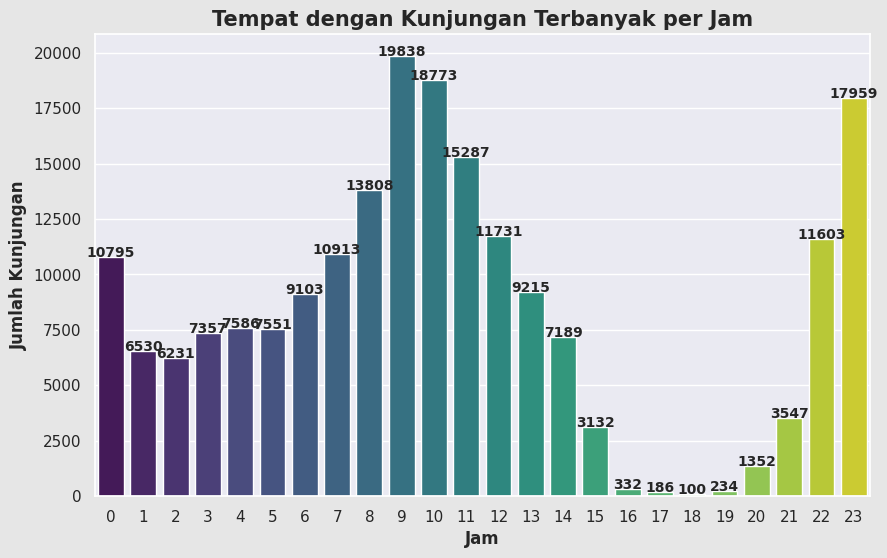

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

for i, val in enumerate(terbanyak_per_jam["jumlah_kunjungan"]):
    plt.text(i, val + 0.2, f"{val}",
             ha="center", fontsize = 10, fontweight = 'bold')

sns.set_color_codes("pastel")
sns.barplot(x = terbanyak_per_jam["jam"],
            y = terbanyak_per_jam["jumlah_kunjungan"],
            palette="viridis")

plt.title("Tempat dengan Kunjungan Terbanyak per Jam", fontsize=15, fontweight='bold')
plt.xlabel("Jam", fontweight='bold')
plt.ylabel("Jumlah Kunjungan", fontweight='bold')
plt.gcf().set_facecolor('0.9')
plt.show()

Pertanyaan d)

In [ ]:
# Hitung jumlah kunjungan berdasarkan tempat dan musim
kunjungan_musim =(
    new_data.groupby(["musim", "venueCategory"])
    .size()
    .reset_index(name="jumlah_kunjungan")
)

# Ambil tempat dengan kunjungan terbanyak di setiap musim
terbanyak_per_musim = kunjungan_musim.loc[kunjungan_musim.groupby("musim")["jumlah_kunjungan"]
                                          .idxmax()]

<ipython-input-47-7fa834efc780>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




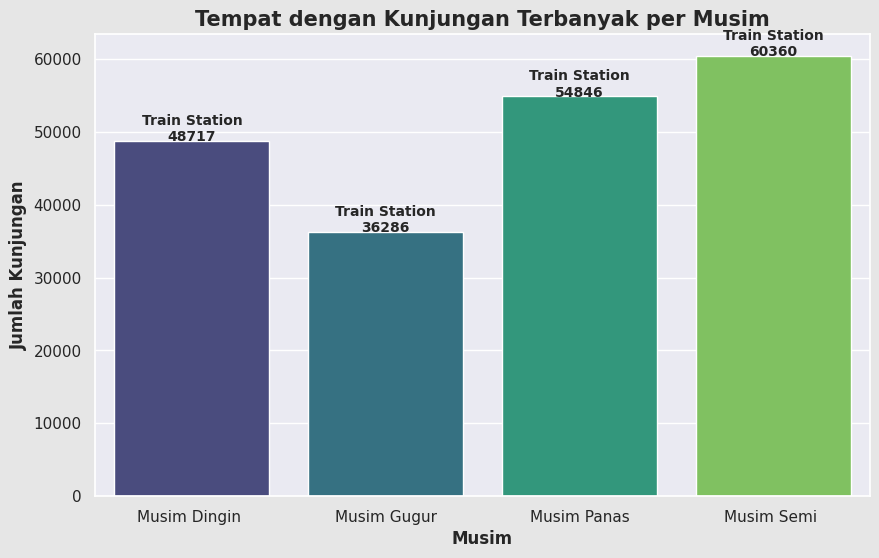

In [ ]:
# Visualisasi Jumlah Kunjungan Terbanyak di setiap Musim
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

for i, val in enumerate(terbanyak_per_musim["jumlah_kunjungan"]):
    plt.text(i, val + 0.2, f"{terbanyak_per_musim.iloc[i]['venueCategory']}\n{val}",
             ha="center", fontsize=10, fontweight='bold')

sns.set_color_codes("pastel")
sns.barplot(x = terbanyak_per_musim["musim"],
            y = terbanyak_per_musim["jumlah_kunjungan"],
            palette="viridis")

plt.title("Tempat dengan Kunjungan Terbanyak per Musim", fontsize=15, fontweight='bold')
plt.xlabel("Musim", fontweight='bold')
plt.ylabel("Jumlah Kunjungan", fontweight='bold')
plt.gcf().set_facecolor('0.9')
plt.show()

In [ ]:
# Hitung jumlah kunjungan berdasarkan tempat dan musim, ambil 5 tertinggi per musim
top5_musim = (
    new_data.groupby(["musim", "venueCategory"])
    .size()
    .reset_index(name="jumlah_kunjungan")
    .groupby("musim")
    .apply(lambda x: x.nlargest(5, "jumlah_kunjungan"))
    .reset_index(drop=True)
    )

<ipython-input-48-f4bc8eba3ccd>:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



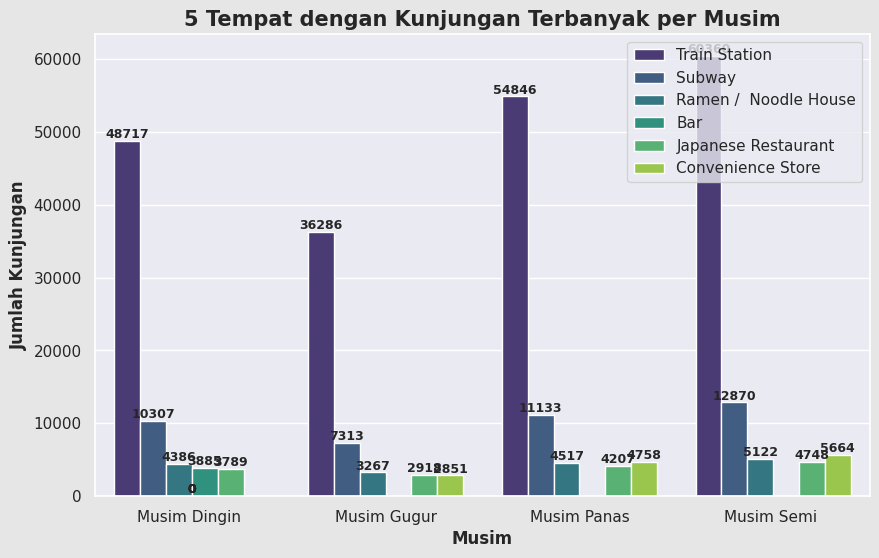

In [ ]:
# Visualisasi 5 Tempat dengan Kunjungan Terbanyak per Musim
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x = top5_musim["musim"], y = top5_musim["jumlah_kunjungan"],
                      hue = top5_musim["venueCategory"], palette="viridis")

for bar in barplot.patches:
    bar_x = bar.get_x() + bar.get_width() / 2  # Posisi x di tengah bar
    bar_y = bar.get_height()  # Posisi y di atas bar
    plt.text(
        bar_x,
        bar_y + 0.5,  # Tambahkan jarak kecil di atas bar
        f"{int(bar_y)}",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight='bold'
    )

plt.legend(loc='upper right')
plt.xlabel("Musim", fontweight='bold')
plt.ylabel("Jumlah Kunjungan", fontweight='bold')
plt.title("5 Tempat dengan Kunjungan Terbanyak per Musim", fontsize=15, fontweight='bold')
plt.gcf().set_facecolor('0.9')
plt.show()